In [1]:
import matplotlib.pyplot as plt
import numpy as np

# импортируем имеющиеся в библиотеке skimage фотографии
from skimage import data

__Черно-белые изображения__

In [2]:
# импортируем черно-белую фотографию
camera_img = data.camera()

C:\Users\DS\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


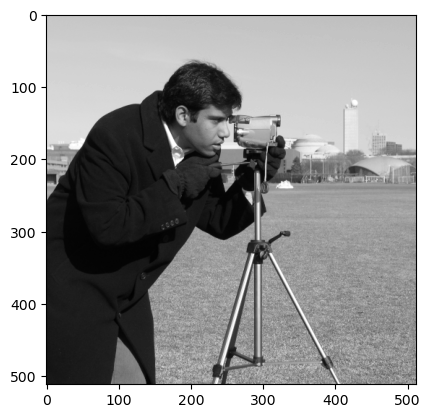

In [3]:
# вомпользуемся фанкцие imshow для показа изображения
# по умолчанию, imshow преобразует черно-белые фото в цветные,
# чтобы этого не происходило, нужно указать параметр cmap = 'gray'
plt.imshow(camera_img, cmap = 'gray')

In [4]:
# посмотрим на тип данных
type(camera_img)

numpy.ndarray

In [5]:
# посмотрим на размерность
camera_img.shape

(512, 512)

In [6]:
# и общее количество пикселей
camera_img.size

262144

In [7]:
# каждое значение состоит из целых чисел длиной 8 бит
camera_img.dtype

dtype('uint8')

In [8]:
# диапазон этого значения (т.е. оттенков) от черного (0) до белого (255)
camera_img.min(), camera_img.max()

(0, 255)

In [9]:
# задав координаты конкретного пикселя, мы можем посмотреть его оттенок
camera_img[50, 50]

207

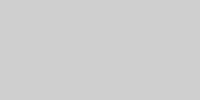

In [10]:
# посмотрим на этот цвет
from PIL import Image

sample1 = Image.new(mode = 'L', size = (200, 100), color = 207)
sample1

Цветные изображения

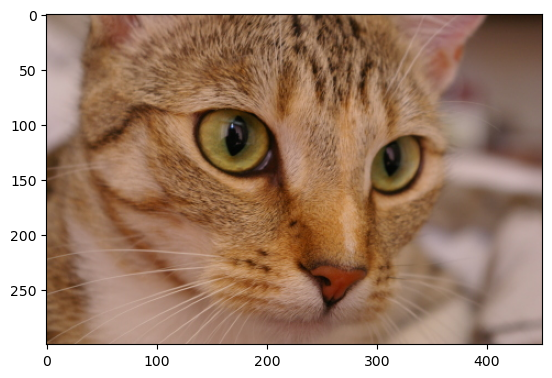

In [11]:
# импортируем цветную фотографию
cat_img = data.chelsea()

plt.imshow(cat_img)

In [12]:
# посмотрим на размерность
cat_img.shape

(300, 451, 3)

In [13]:
# отобразим количество пикселей
cat_img.size

405900

In [14]:
# посмотрим оттенки пикселя
cat_img[50, 50]

array([138,  98,  63], dtype=uint8)

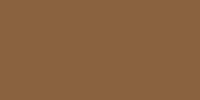

In [15]:
# визуализируем этот цвет
sample2 = Image.new(mode = 'RGB', size = (200, 100), color = (138,  98,  63))
sample2

Text(0.5, 1.0, 'Оттенки синего')

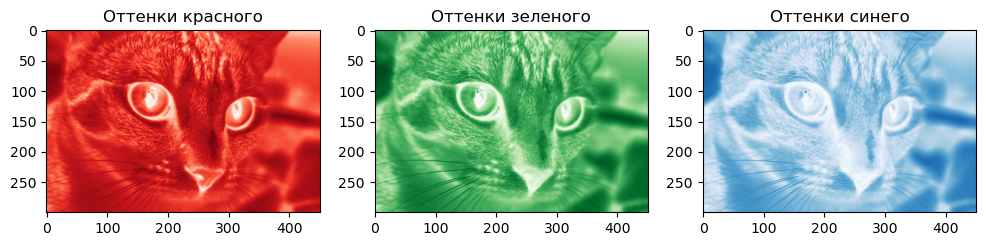

In [16]:
# функция subplot дает возможность вывести сразу несколько изображений, в качестве параметров
# передаем количество строк и столбцов сетки изображений (1 х 3) и размер графиков
fig, ax = plt.subplots(1, 3, figsize = (12, 4))

# выводим каждое изображение по отдельности
ax[0].imshow(cat_img[:,:,0], cmap = 'Reds')
ax[0].set_title('Оттенки красного')

ax[1].imshow(cat_img[:,:,1], cmap = 'Greens')
ax[1].set_title('Оттенки зеленого')

ax[2].imshow(cat_img[:,:,2], cmap = 'Blues')
ax[2].set_title('Оттенки синего')

Гистограмма


In [19]:
import cv2

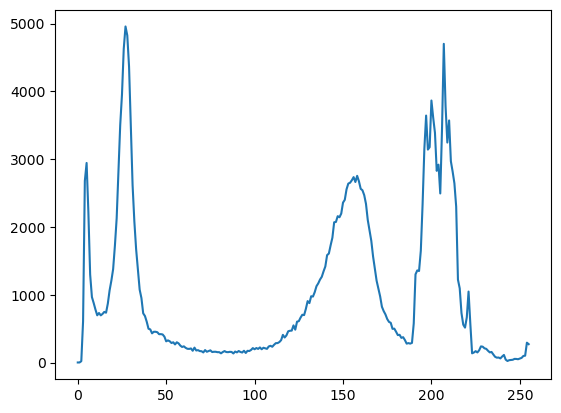

In [20]:
# для начала выведем ч/б гистограмму 
hist_gray = cv2.calcHist([camera_img], [0], None, [256], [0, 256])
plt.plot(hist_gray)

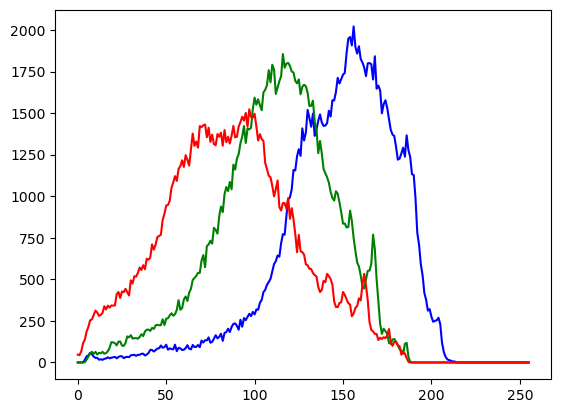

In [23]:
# выведем цветную гистограмму
color = ('b', 'g', 'r')

# с помощью цикла for пройдемся по цветам ('b', 'g', 'r')
# и соответствующим каналам [0, 1, 2] с помощью enumerate
for channel, col in enumerate(color):
    hist_color = cv2.calcHist([cat_img], [channel], None, [256], [0, 256])
    plt.plot(hist_color, color = col)

Обработка изображений

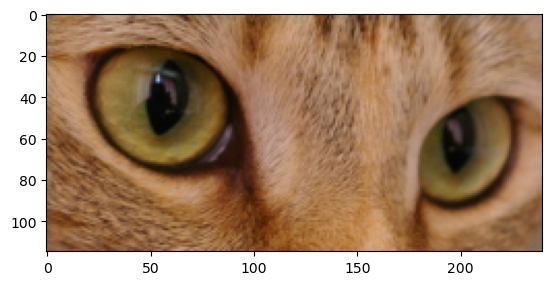

In [25]:
# покажем только глаза кошки
eyes = cat_img[70:185, 115:355]
plt.imshow(eyes)

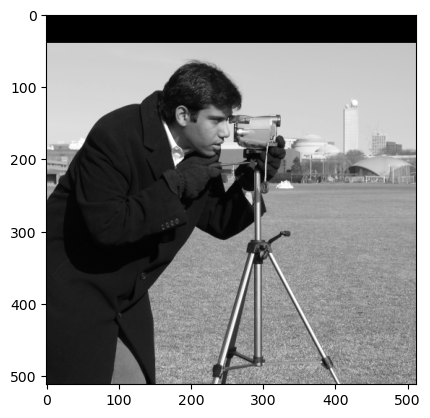

In [26]:
# можно закрасить часть картинки или даже один пиксель
camera_img[:40] = 0
plt.imshow(camera_img, cmap = 'gray')

Перевод цветного изображения в черно-белое

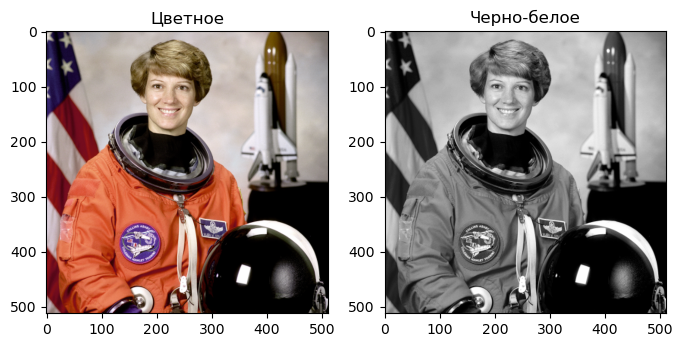

In [28]:
from skimage.color import rgb2gray

color_img = data.astronaut()
grayscale_img = rgb2gray(color_img)

fig, ax = plt.subplots(1, 2, figsize = (8, 4))

ax[0].imshow(color_img)
ax[0].set_title('Цветное')

ax[1].imshow(grayscale_img, cmap = 'gray')
ax[1].set_title('Черно-белое')

plt.show()

In [29]:
# проверим правильность изображений
print(color_img.shape, grayscale_img.shape)

(512, 512, 3) (512, 512)


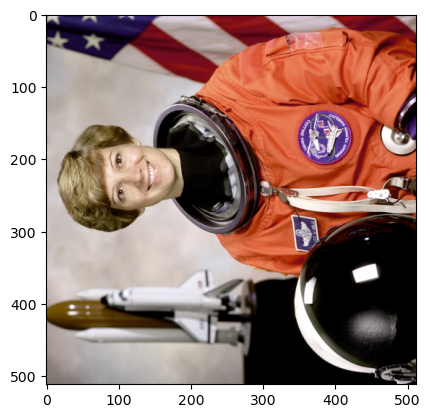

In [30]:
# транспонируем матрицу (изображение)
color_img = np.transpose(color_img, (1, 0, 2))
plt.imshow(color_img)

Настоящее черно-белое изображение

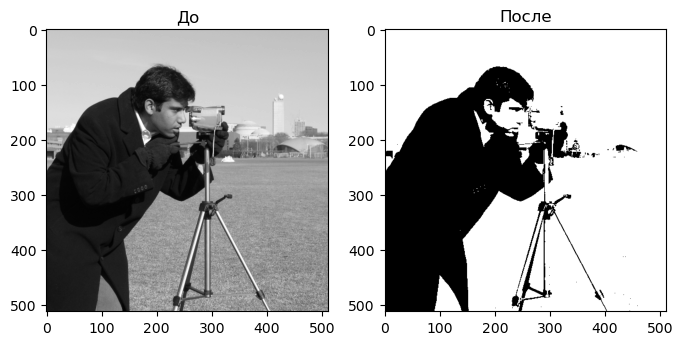

In [33]:
# вновь импортируем ч/б изображение
camera_img_2 = data.camera()

# если значение пикселя ниже 87, сделаем его черным, выше - белым
binary = camera_img_2 > 87

fig, ax = plt.subplots(1, 2, figsize = (8, 4))

ax[0].imshow(camera_img_2, cmap = 'gray')
ax[0].set_title('До')

ax[1].imshow(binary, cmap = 'gray')
ax[1].set_title('После')

plt.show()